In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data_values =pd.read_csv("/content/drive/MyDrive/30k.csv")


In [ ]:
data_values

,ut_ms,sa,sx,sy,sz,AAAA,AACF,ADMC,AHHH,AMMM,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
0,2008-08-22 00:00:00,0.33875,14.554375,90.33875,104.550000,0,0,0,0,0,...,0.000573,0.001516,0.159513,0.005706,0.005196,0.000530,0.000523,0.000776,0.006780,0.003320
1,2008-08-22 00:15:00,0.34000,14.550000,90.34000,104.550000,4,0,0,0,0,...,0.000573,0.001527,0.159513,0.005587,0.005231,0.000534,0.000531,0.000765,0.006734,0.003366
2,2008-08-22 00:30:00,0.33875,14.550000,90.33875,104.550000,0,0,0,0,0,...,0.000572,0.001535,0.160132,0.005853,0.005291,0.000522,0.000526,0.000759,0.006724,0.003339
3,2008-08-22 00:45:00,0.34000,14.550000,90.34000,104.545333,0,0,0,0,0,...,0.000573,0.001527,0.159702,0.005864,0.005373,0.000530,0.000520,0.000750,0.006826,0.003504
4,2008-08-22 01:00:00,0.34000,14.550000,90.34000,104.540000,0,0,0,0,0,...,0.000565,0.001516,0.158756,0.005745,0.005124,0.000512,0.000513,0.000745,0.006734,0.003297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33019,2009-07-31 22:45:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.000553,0.001474,0.002275,0.005547,0.069760,0.000505,0.000502,0.000714,0.006457,0.003227
33020,2009-07-31 23:00:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.000553,0.001474,0.002280,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227
33021,2009-07-31 23:15:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.000553,0.001474,0.002294,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227
33022,2009-07-31 23:30:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.000553,0.001474,0.002322,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227


In [ ]:
import numpy as np

In [ ]:
#Convert degrees to radians
data_values['sa_rad'] = np.radians(data_values['sa'])
data_values['sx_rad'] = np.radians(data_values['sx'])
data_values['sy_rad'] = np.radians(data_values['sy'])
data_values['sz_rad'] = np.radians(data_values['sz'])

#Calculate the cosine of each angle
data_values['cos_sa'] = np.cos(data_values['sa_rad'])
data_values['cos_sx'] = np.cos(data_values['sx_rad'])
data_values['cos_sy'] = np.cos(data_values['sy_rad'])
data_values['cos_sz'] = np.cos(data_values['sz_rad'])

#Display the resulting DataFrame with the cosine values
data_values[['ut_ms', 'cos_sa', 'cos_sx', 'cos_sy', 'cos_sz']]

,ut_ms,cos_sa,cos_sx,cos_sy,cos_sz
0,2008-08-22 00:00:00,0.999983,0.967910,-0.005912,-0.251225
1,2008-08-22 00:15:00,0.999982,0.967929,-0.005934,-0.251225
2,2008-08-22 00:30:00,0.999983,0.967929,-0.005912,-0.251225
3,2008-08-22 00:45:00,0.999982,0.967929,-0.005934,-0.251146
4,2008-08-22 01:00:00,0.999982,0.967929,-0.005934,-0.251056
...,...,...,...,...,...
33019,2009-07-31 22:45:00,0.999998,0.865064,-0.001920,-0.501662
33020,2009-07-31 23:00:00,0.999998,0.865064,-0.001920,-0.501662
33021,2009-07-31 23:15:00,0.999998,0.865064,-0.001920,-0.501662
33022,2009-07-31 23:30:00,0.999998,0.865064,-0.001920,-0.501662


In [ ]:
# Assume P_max
P_max = 1000

# Calculate power generated based on the cosine of the solar aspect angle (sa)
data_values['power_generated'] = P_max * data_values['cos_sa']# divided by the dist bten the square of the dist betwn mars and sun
#data_values['energy_rec_sx'] = P_max * data_values['cos_sx']/d**2
#for all the angle calculate the energy recived
data_values[['ut_ms', 'cos_sa', 'power_generated']]


,ut_ms,cos_sa,power_generated
0,2008-08-22 00:00:00,0.999983,999.982522
1,2008-08-22 00:15:00,0.999982,999.982393
2,2008-08-22 00:30:00,0.999983,999.982522
3,2008-08-22 00:45:00,0.999982,999.982393
4,2008-08-22 01:00:00,0.999982,999.982393
...,...,...,...
33019,2009-07-31 22:45:00,0.999998,999.998157
33020,2009-07-31 23:00:00,0.999998,999.998157
33021,2009-07-31 23:15:00,0.999998,999.998157
33022,2009-07-31 23:30:00,0.999998,999.998157


In [ ]:
data_values

,ut_ms,sa,sx,sy,sz,AAAA,AACF,ADMC,AHHH,AMMM,...,NPWD2882,sa_rad,sx_rad,sy_rad,sz_rad,cos_sa,cos_sx,cos_sy,cos_sz,power_generated
0,2008-08-22 00:00:00,0.33875,14.554375,90.33875,104.550000,0,0,0,0,0,...,0.003320,0.005912,0.254022,1.576709,1.824742,0.999983,0.967910,-0.005912,-0.251225,999.982522
1,2008-08-22 00:15:00,0.34000,14.550000,90.34000,104.550000,4,0,0,0,0,...,0.003366,0.005934,0.253945,1.576730,1.824742,0.999982,0.967929,-0.005934,-0.251225,999.982393
2,2008-08-22 00:30:00,0.33875,14.550000,90.33875,104.550000,0,0,0,0,0,...,0.003339,0.005912,0.253945,1.576709,1.824742,0.999983,0.967929,-0.005912,-0.251225,999.982522
3,2008-08-22 00:45:00,0.34000,14.550000,90.34000,104.545333,0,0,0,0,0,...,0.003504,0.005934,0.253945,1.576730,1.824660,0.999982,0.967929,-0.005934,-0.251146,999.982393
4,2008-08-22 01:00:00,0.34000,14.550000,90.34000,104.540000,0,0,0,0,0,...,0.003297,0.005934,0.253945,1.576730,1.824567,0.999982,0.967929,-0.005934,-0.251056,999.982393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33019,2009-07-31 22:45:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157
33020,2009-07-31 23:00:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157
33021,2009-07-31 23:15:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157
33022,2009-07-31 23:30:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157


In [ ]:
total_nan = data_values.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")


Total NaN values in the DataFrame: 0


In [ ]:
data_values = data_values.dropna()

In [ ]:
total_nan = data_values.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")


Total NaN values in the DataFrame: 0


In [ ]:
data_values

,ut_ms,sa,sx,sy,sz,AAAA,AACF,ADMC,AHHH,AMMM,...,NPWD2882,sa_rad,sx_rad,sy_rad,sz_rad,cos_sa,cos_sx,cos_sy,cos_sz,power_generated
0,2008-08-22 00:00:00,0.33875,14.554375,90.33875,104.550000,0,0,0,0,0,...,0.003320,0.005912,0.254022,1.576709,1.824742,0.999983,0.967910,-0.005912,-0.251225,999.982522
1,2008-08-22 00:15:00,0.34000,14.550000,90.34000,104.550000,4,0,0,0,0,...,0.003366,0.005934,0.253945,1.576730,1.824742,0.999982,0.967929,-0.005934,-0.251225,999.982393
2,2008-08-22 00:30:00,0.33875,14.550000,90.33875,104.550000,0,0,0,0,0,...,0.003339,0.005912,0.253945,1.576709,1.824742,0.999983,0.967929,-0.005912,-0.251225,999.982522
3,2008-08-22 00:45:00,0.34000,14.550000,90.34000,104.545333,0,0,0,0,0,...,0.003504,0.005934,0.253945,1.576730,1.824660,0.999982,0.967929,-0.005934,-0.251146,999.982393
4,2008-08-22 01:00:00,0.34000,14.550000,90.34000,104.540000,0,0,0,0,0,...,0.003297,0.005934,0.253945,1.576730,1.824567,0.999982,0.967929,-0.005934,-0.251056,999.982393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33019,2009-07-31 22:45:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157
33020,2009-07-31 23:00:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157
33021,2009-07-31 23:15:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157
33022,2009-07-31 23:30:00,0.11000,30.110000,90.11000,120.110000,0,0,0,0,0,...,0.003227,0.001920,0.525519,1.572716,2.096315,0.999998,0.865064,-0.001920,-0.501662,999.998157


In [ ]:
columns_to_drop = ['sa', 'sx', 'sy','sz','sa_rad','sx_rad','sy_rad','sz_rad','cos_sx','cos_sy','cos_sz']

data_values = data_values.drop(columns=columns_to_drop)




In [ ]:
data_values

,ut_ms,AAAA,AACF,ADMC,AHHH,AMMM,AOOO,APSF,APWF,ASEQ,...,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882,cos_sa,power_generated
0,2008-08-22 00:00:00,0,0,0,0,0,0,0,0,0,...,0.159513,0.005706,0.005196,0.000530,0.000523,0.000776,0.006780,0.003320,0.999983,999.982522
1,2008-08-22 00:15:00,4,0,0,0,0,0,0,0,0,...,0.159513,0.005587,0.005231,0.000534,0.000531,0.000765,0.006734,0.003366,0.999982,999.982393
2,2008-08-22 00:30:00,0,0,0,0,0,0,0,0,0,...,0.160132,0.005853,0.005291,0.000522,0.000526,0.000759,0.006724,0.003339,0.999983,999.982522
3,2008-08-22 00:45:00,0,0,0,0,0,0,0,0,1,...,0.159702,0.005864,0.005373,0.000530,0.000520,0.000750,0.006826,0.003504,0.999982,999.982393
4,2008-08-22 01:00:00,0,0,0,0,0,0,0,0,0,...,0.158756,0.005745,0.005124,0.000512,0.000513,0.000745,0.006734,0.003297,0.999982,999.982393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33019,2009-07-31 22:45:00,0,0,0,0,0,0,0,0,0,...,0.002275,0.005547,0.069760,0.000505,0.000502,0.000714,0.006457,0.003227,0.999998,999.998157
33020,2009-07-31 23:00:00,0,0,0,0,0,0,0,0,0,...,0.002280,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227,0.999998,999.998157
33021,2009-07-31 23:15:00,0,0,0,0,0,0,0,0,0,...,0.002294,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227,0.999998,999.998157
33022,2009-07-31 23:30:00,0,0,0,0,0,0,0,0,0,...,0.002322,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227,0.999998,999.998157


In [ ]:
data_values['ut_ms'] = pd.to_datetime(data_values['ut_ms'])


In [ ]:
data_values.set_index('ut_ms', inplace=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:

import torch
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the entire DataFrame
data_values = pd.DataFrame(scaler.fit_transform(data_values), columns=data_values.columns)

normalized_df = data_values.copy()

print(normalized_df)


         AAAA  AACF  ADMC  AHHH  AMMM  AOOO  APSF  APWF  ASEQ  ASSS  ...  \
0      0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0625   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.5   0.0  ...   
4      0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
33019  0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
33020  0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
33021  0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
33022  0.0000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
33023  0.0625   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

       NPWD2802  NPWD2821  NPWD2851  NPWD2852  NPWD2871  NPWD2872  NPWD2881  \
0      0

In [ ]:
#Train-test split
train_data, test_data = train_test_split(normalized_df.values, test_size=0.2, shuffle=False)

#Sequences for the GRU model
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

sequence_length = 10

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

<ipython-input-18-87c016b0c1a3>:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)


In [ ]:
# Create DataLoader for batching
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Define the weight initialization function
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)
    elif isinstance(m, nn.GRU):
        for name, param in m.named_parameters():
            if 'weight_ih' in name:
                torch.nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                torch.nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                param.data.fill_(0)

In [ ]:
# Define the GRU model with Layer Normalization
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.ln = nn.LayerNorm(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.gru.num_layers, x.size(0), self.gru.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.ln(out[:, -1, :])
        out = self.fc(out)
        return out[:, None]

class StackedGRUPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, num_predictors=3):
        super(StackedGRUPredictor, self).__init__()
        self.predictors = nn.ModuleList([GRUModel(input_size, hidden_size, num_layers, output_size) for _ in range(num_predictors)])

    def forward(self, x):
        predictions = [predictor(x) for predictor in self.predictors]
        stacked_predictions = torch.stack(predictions, dim=0)
        mean_prediction = torch.mean(stacked_predictions, dim=0)
        return mean_prediction


In [ ]:
# Define model parameters
input_size = X_train.shape[2]
hidden_size = 64
num_layers = 2
output_size = y_train.shape[1]
num_predictors = 3

In [ ]:
# Instantiate the Stacked GRU model
model = StackedGRUPredictor(input_size, hidden_size, num_layers, output_size, num_predictors).to(device)
model.apply(init_weights)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    for seqs, labels in train_dataloader:
        # Move input data to the same device as the model
        seqs, labels = seqs.to(device), labels.to(device)  # Move data to GPU

        optimizer.zero_grad()
        outputs = model(seqs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 108])) that is different to the input size (torch.Size([32, 1, 108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9, 108])) that is different to the input size (torch.Size([9, 1, 108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Loss: 0.0163
Epoch [2/10], Loss: 0.0155
Epoch [3/10], Loss: 0.0151
Epoch [4/10], Loss: 0.0148
Epoch [5/10], Loss: 0.0145
Epoch [6/10], Loss: 0.0143
Epoch [7/10], Loss: 0.0141
Epoch [8/10], Loss: 0.0139
Epoch [9/10], Loss: 0.0138
Epoch [10/10], Loss: 0.0138


In [ ]:
# Evaluate model on test data
model.eval()
test_loss = 0
batch_size = 1024  # Adjust as needed based on your GPU memory
with torch.no_grad():
    for i in range(0, X_test.size(0), batch_size):
        batch_X = X_test[i:i+batch_size].to(device)
        batch_y = y_test[i:i+batch_size].to(device)
        predictions = model(batch_X)
        test_loss += criterion(predictions, batch_y).item() * batch_X.size(0)  # Weighted sum for averaging

test_loss /= X_test.size(0)  # Average the loss over all batches
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0123


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024, 108])) that is different to the input size (torch.Size([1024, 1, 108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([451, 108])) that is different to the input size (torch.Size([451, 1, 108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
batch_size = 1024
prediction_errors_list = []
num_batches = (y_test.shape[0] + batch_size - 1) // batch_size

with torch.no_grad():
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, y_test.shape[0])

        # Ensure predictions are correctly indexed and move to CPU
        batch_predictions = predictions[start_idx:end_idx].to('cpu').squeeze(1)  # Squeeze to remove any extra dimension
        batch_y_test = y_test[start_idx:end_idx].to('cpu')

        # Adjust the size of batch_y_test to match batch_predictions for the last batch
        if batch_y_test.shape[0] != batch_predictions.shape[0]:
            batch_y_test = batch_y_test[:batch_predictions.shape[0]]

        # Calculate the absolute errors
        batch_errors = torch.abs(batch_y_test - batch_predictions)

        prediction_errors_list.append(batch_errors)

# Concatenate all batch errors into a single tensor
prediction_errors = torch.cat(prediction_errors_list, dim=0)

In [ ]:
print(prediction_errors)

tensor([[0.0073, 0.0113, 0.0134,  ..., 0.0551, 0.0240, 0.0187],
        [0.0105, 0.0106, 0.0117,  ..., 0.0224, 0.0278, 0.0196],
        [0.0066, 0.0063, 0.0109,  ..., 0.0062, 0.0253, 0.0275],
        ...,
        [0.0254, 0.0044, 0.0023,  ..., 0.0150, 0.0031, 0.0136],
        [0.0227, 0.0011, 0.0055,  ..., 0.0152, 0.0093, 0.0095],
        [0.0224, 0.0010, 0.0067,  ..., 0.0710, 0.0031, 0.0145]])


In [ ]:

from scipy.stats import genpareto
# Set the initial threshold using EVT and POT algorithm
def calculate_evt_threshold(errors, quantile=0.90, q=1e-3):
    errors_np = errors.cpu().numpy().flatten()
    threshold = np.quantile(errors_np, quantile)
    excesses = errors_np[errors_np > threshold] - threshold

    # Fit a Generalized Pareto Distribution (GPD) to the excesses
    params = genpareto.fit(excesses)
    shape, loc, scale = params

    # Calculate the threshold using the fitted GPD
    n = len(errors_np)
    N_theta = len(excesses)
    epsilon = threshold + (scale / shape) * ((q * n / N_theta)**(-shape) - 1)

    return epsilon, threshold

epsilon_tr, theta = calculate_evt_threshold(prediction_errors)

In [ ]:
def detect_anomalies(test_errors, epsilon_tr, theta):
    anomaly_values = []  # To store the actual values of anomalies
    epsilon_te = epsilon_tr

    for k in range(test_errors.numel()):
        current_error = test_errors.flatten()[k]  # Get the current error value

        if current_error > epsilon_te:
            anomaly_values.append(current_error)
        elif current_error > theta:
            epsilon_te, _ = calculate_evt_threshold(test_errors.flatten()[:k+1], quantile=0.98)

    return anomaly_values


In [ ]:
anomaly_values = detect_anomalies(prediction_errors, epsilon_tr, theta)
print("Detected anomaly values:", anomaly_values)


Detected anomaly values: [tensor(0.2307), tensor(0.1624), tensor(0.3257), tensor(0.6725), tensor(0.1889), tensor(0.4025), tensor(0.3927), tensor(1.0123), tensor(0.9522), tensor(0.1636), tensor(0.2308), tensor(1.0145), tensor(1.0185), tensor(1.0082), tensor(1.0099), tensor(1.0130), tensor(0.9763), tensor(0.9662), tensor(0.9812), tensor(0.9618), tensor(0.9776), tensor(0.9763), tensor(1.0189), tensor(0.9913), tensor(0.9591), tensor(0.9841), tensor(0.9878), tensor(0.9561), tensor(1.0014), tensor(0.9695), tensor(0.9608), tensor(0.9940), tensor(0.9555), tensor(0.9783), tensor(0.9612), tensor(0.9887), tensor(0.9798), tensor(0.9710), tensor(0.9768), tensor(0.9917), tensor(0.9779), tensor(0.9552), tensor(0.9675), tensor(0.9558), tensor(0.9975), tensor(0.9929), tensor(0.9575), tensor(1.0068), tensor(0.9974), tensor(1.0118), tensor(0.9761), tensor(0.9590), tensor(0.9822), tensor(0.9863), tensor(0.9600), tensor(0.9788), tensor(1.0039), tensor(0.9706), tensor(0.9797), tensor(0.9660), tensor(0.9909)

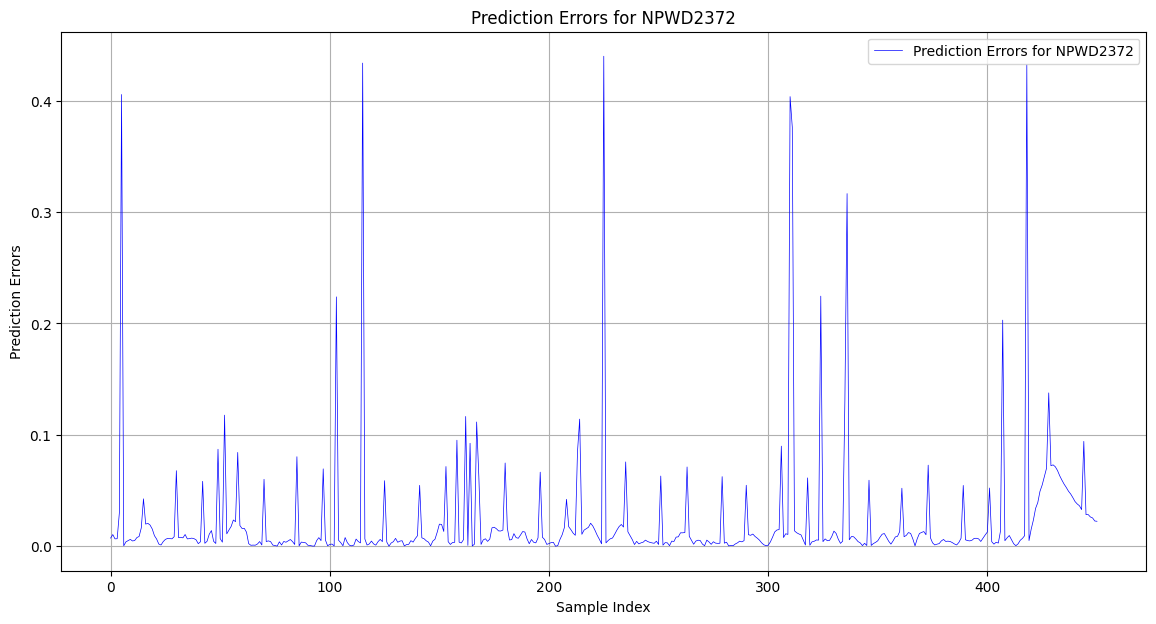

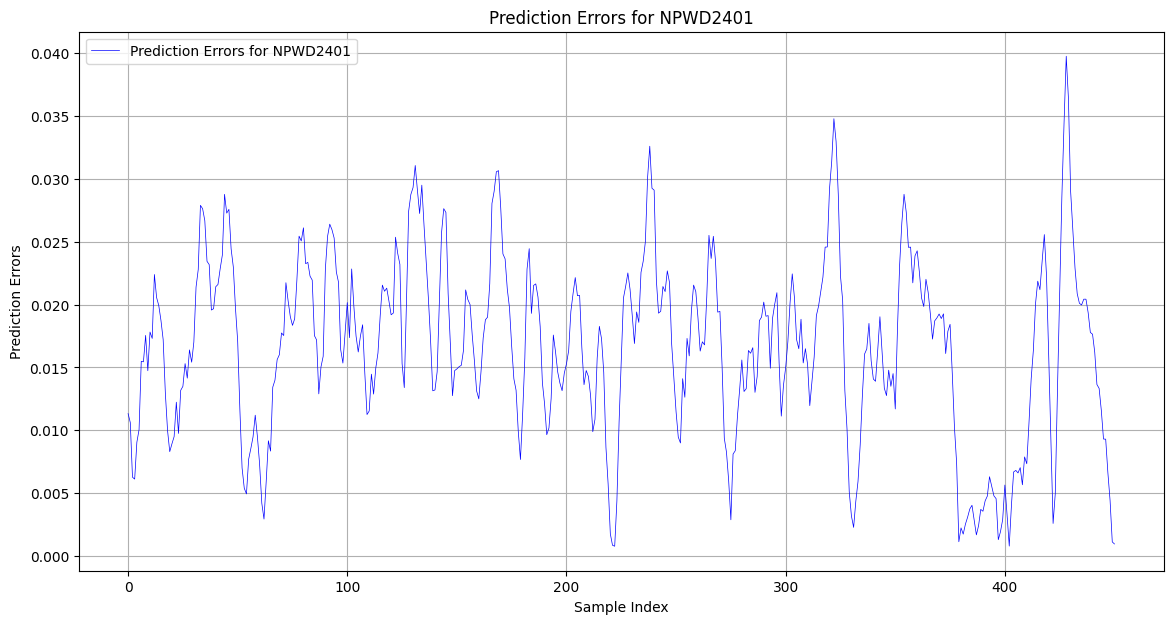

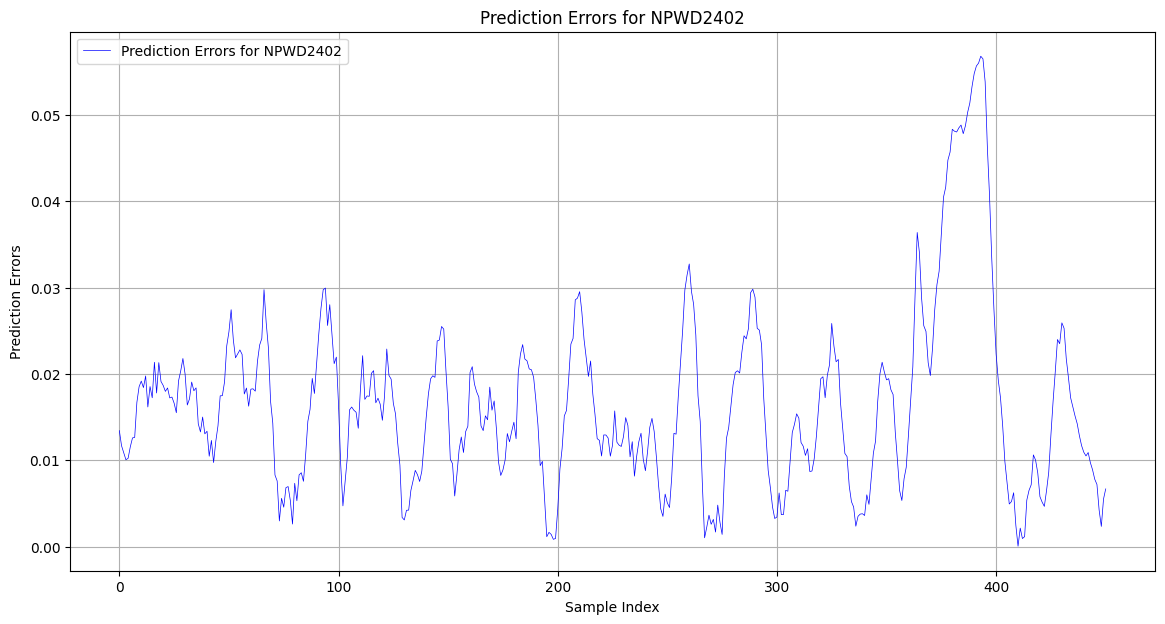

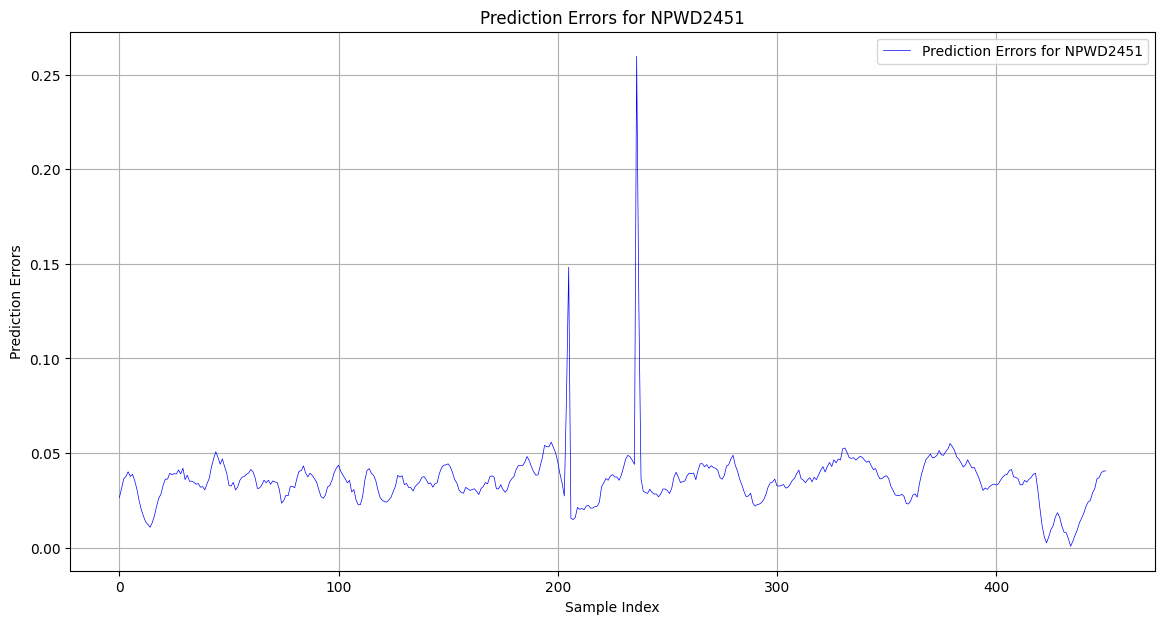

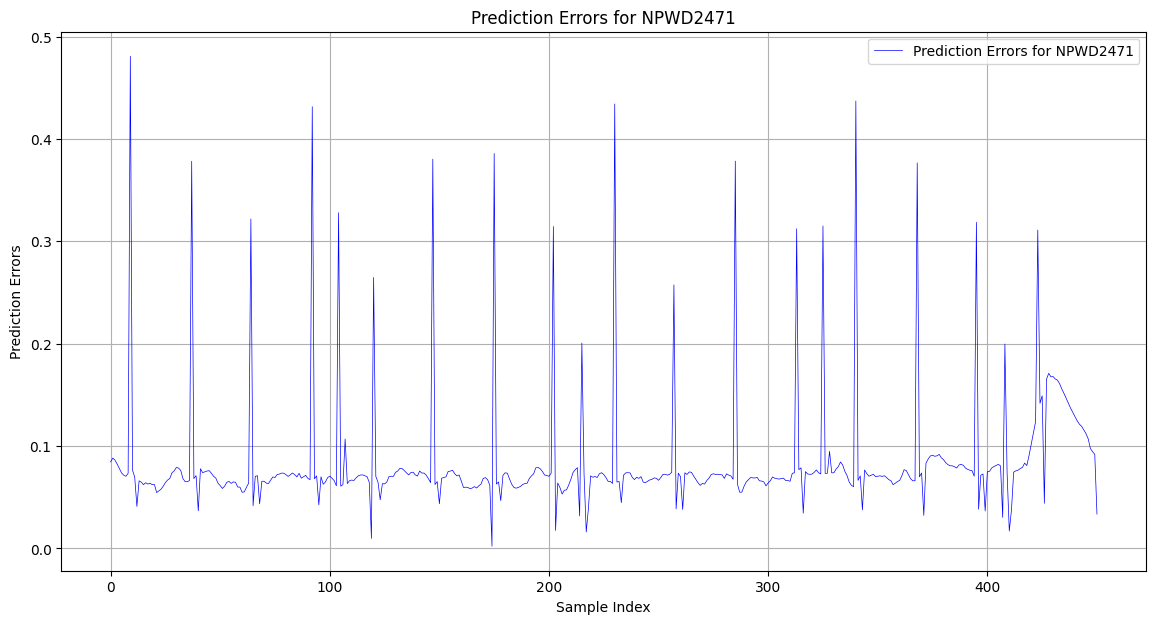

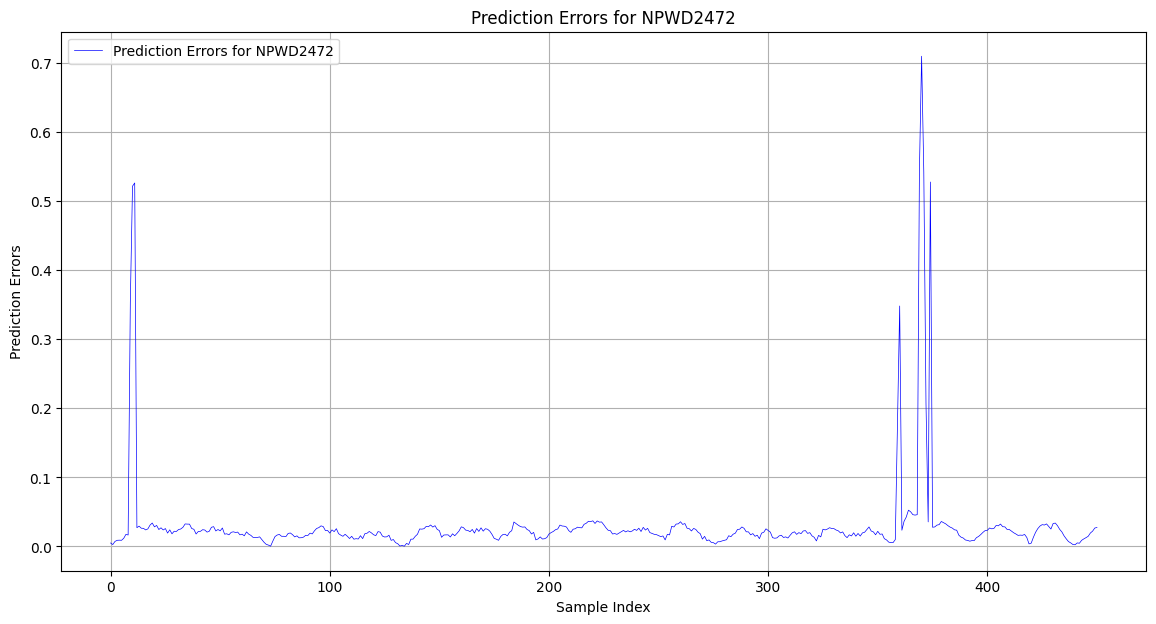

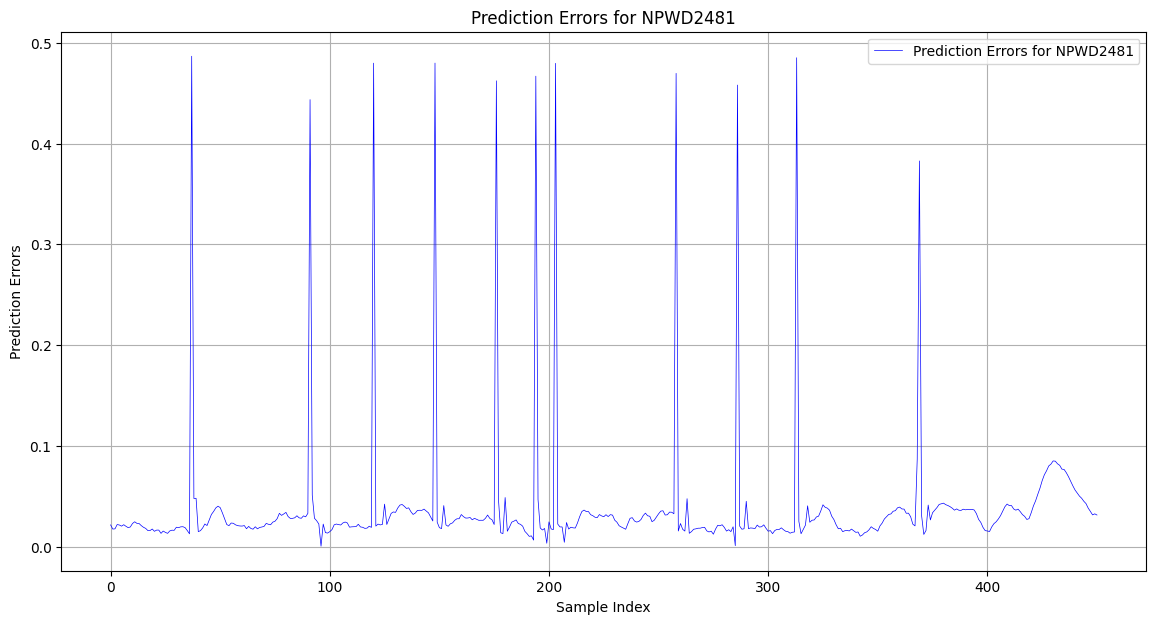

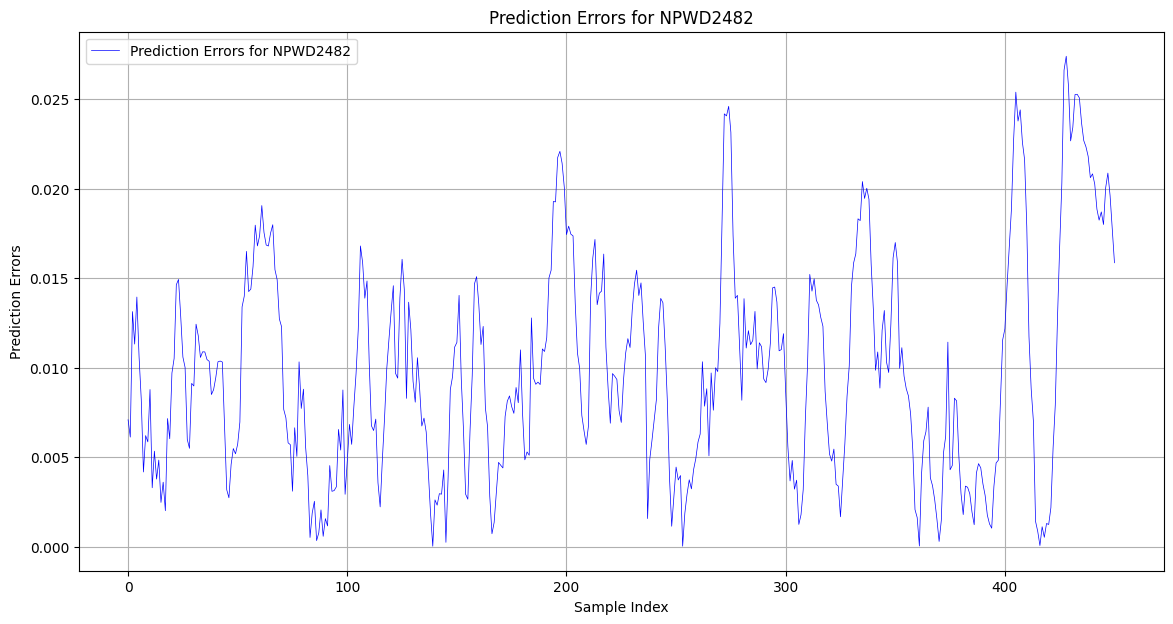

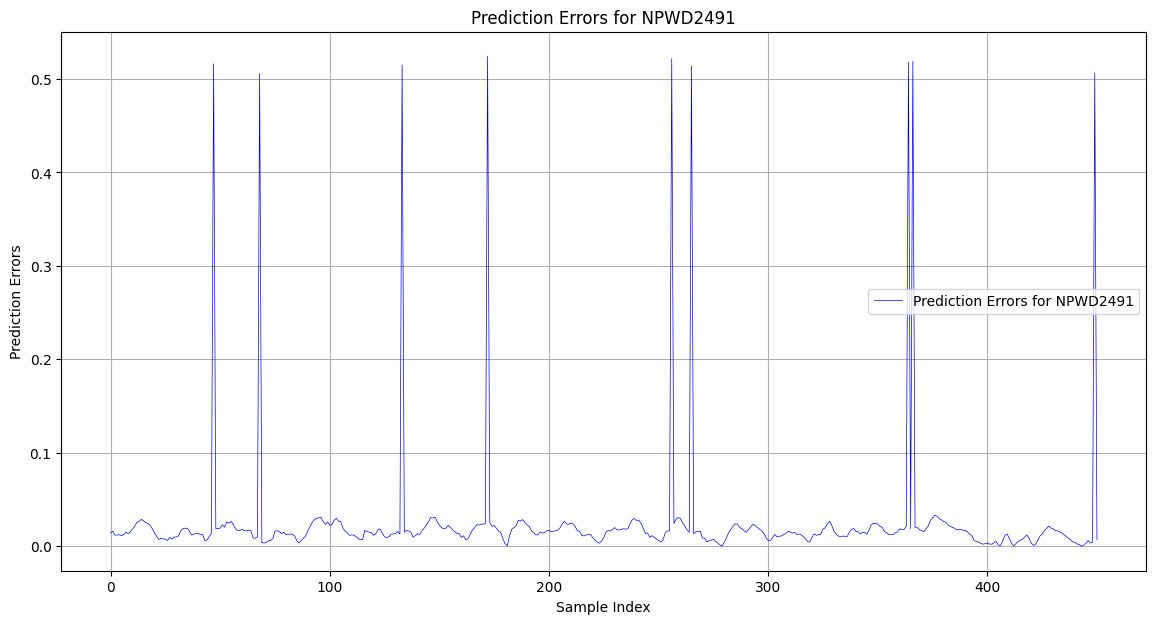

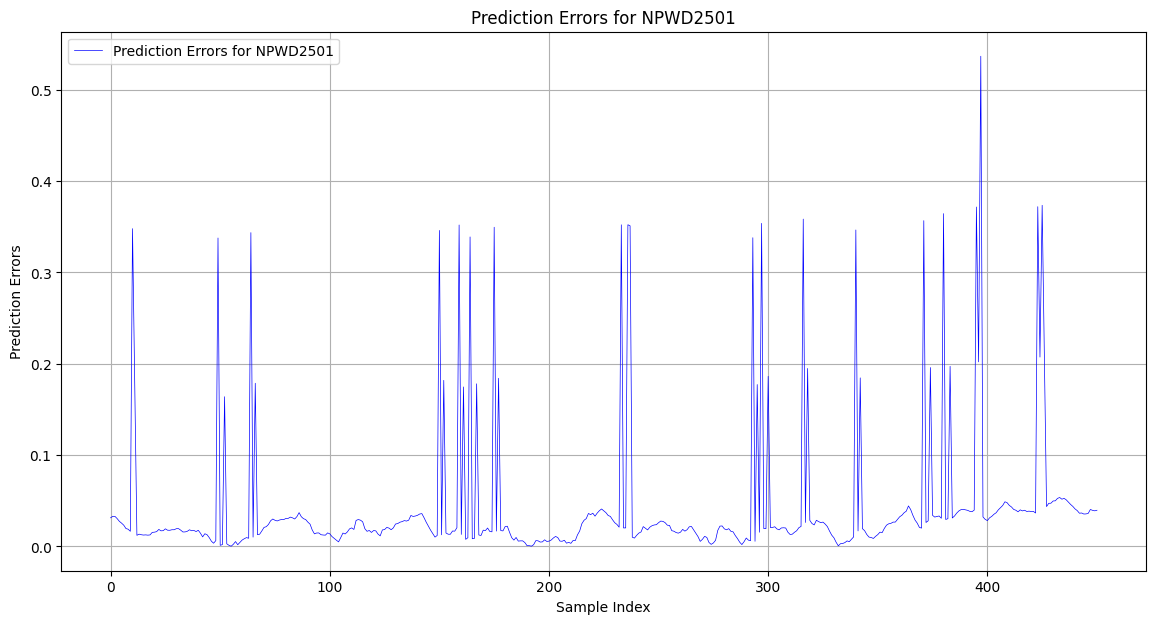

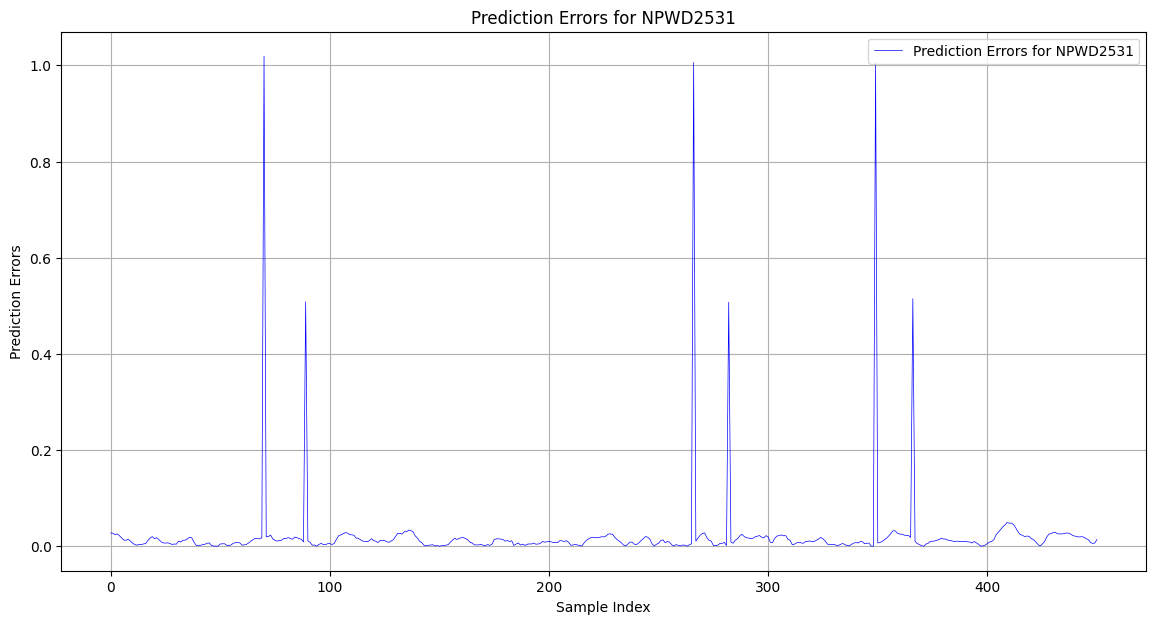

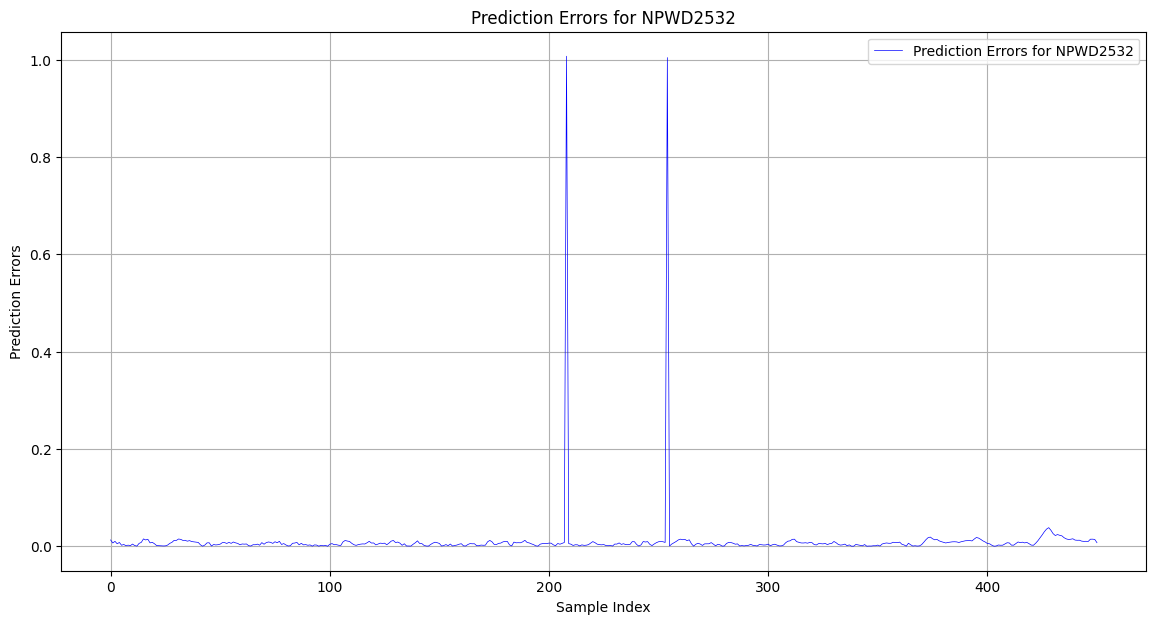

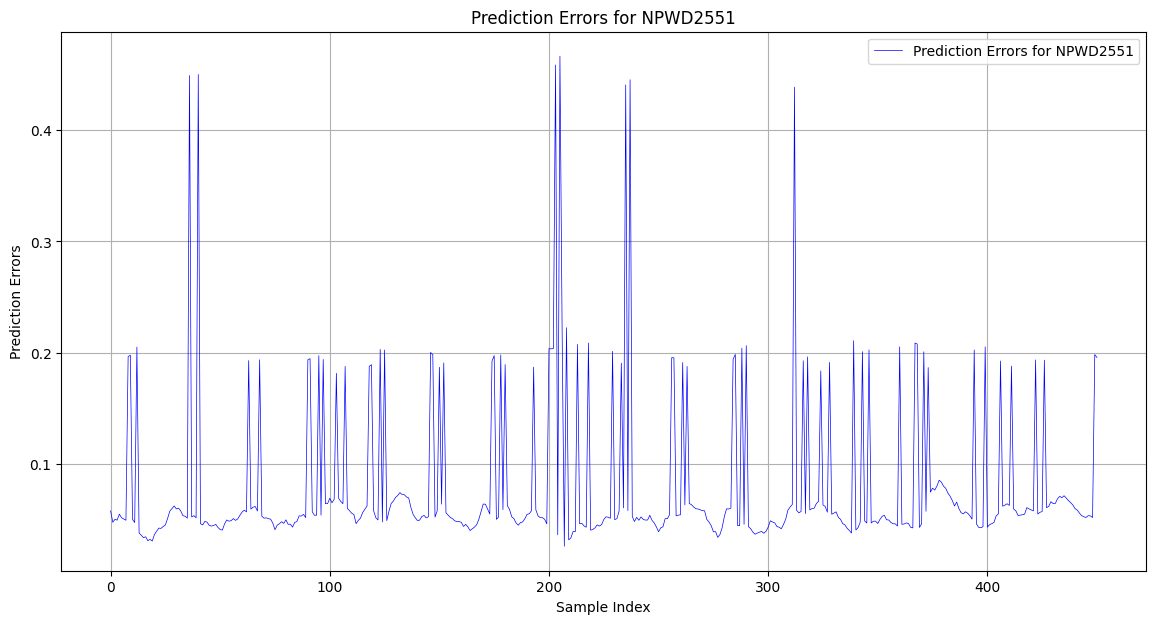

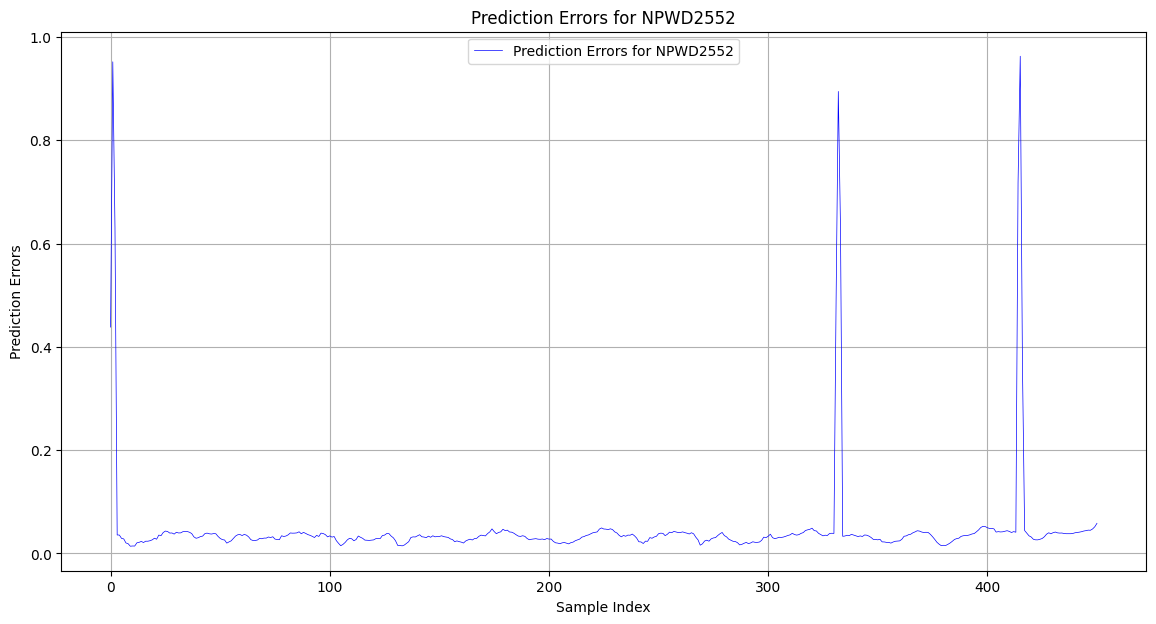

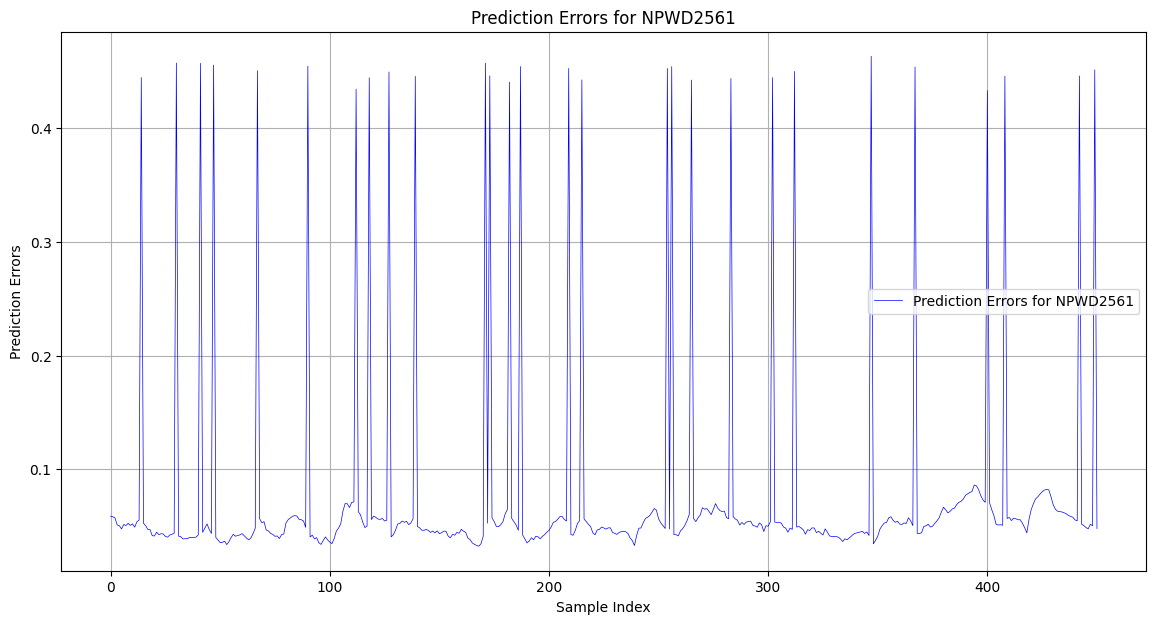

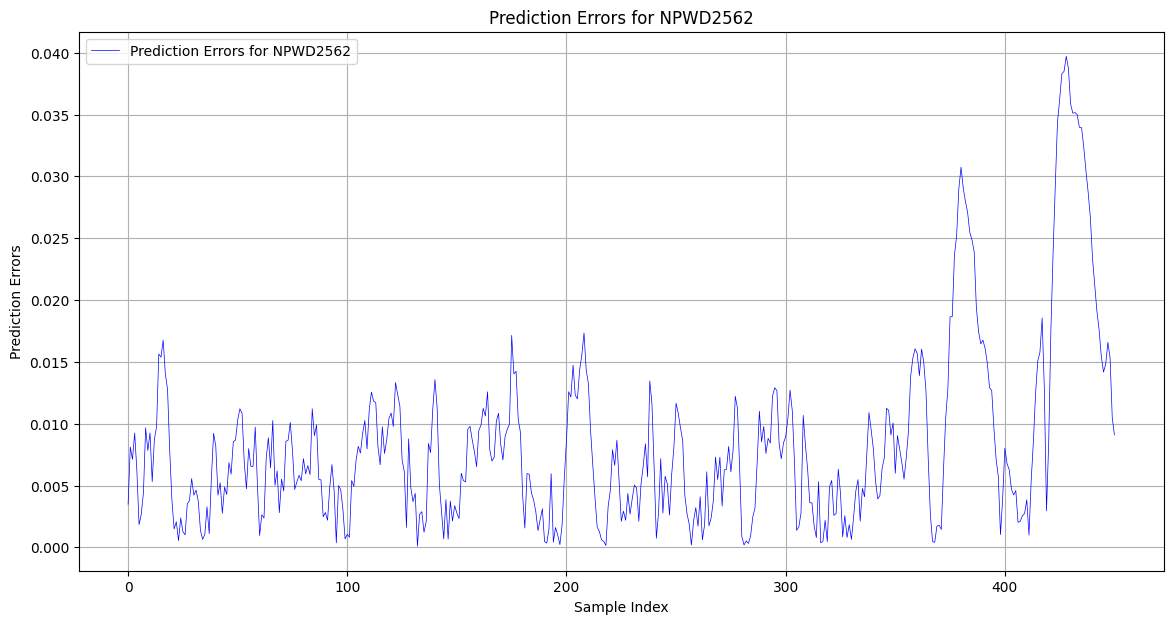

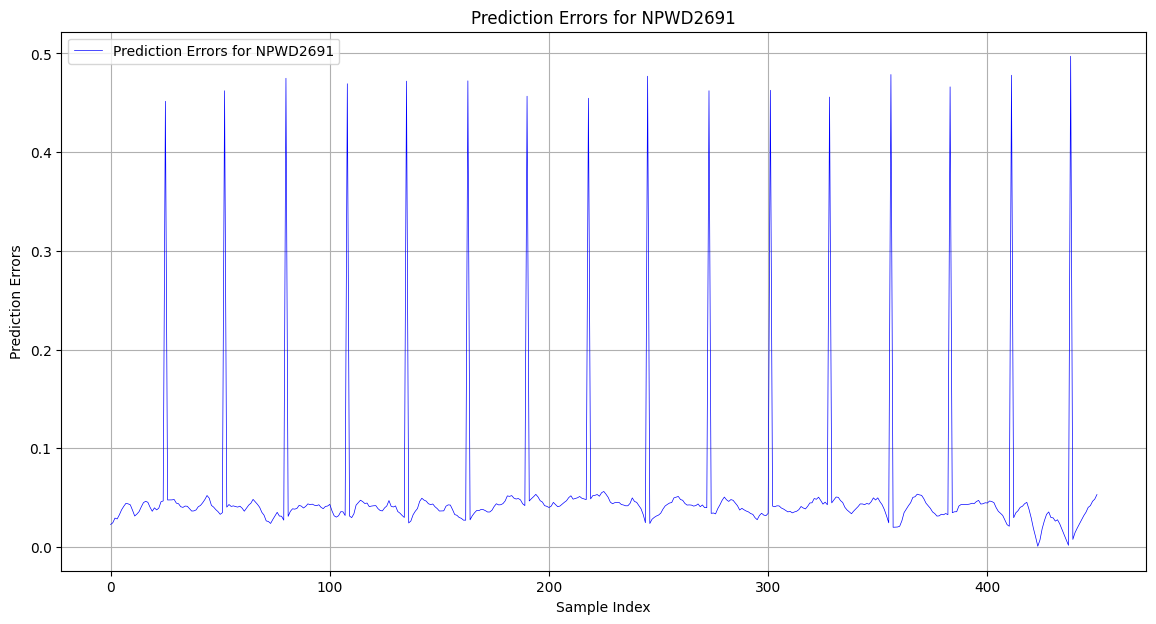

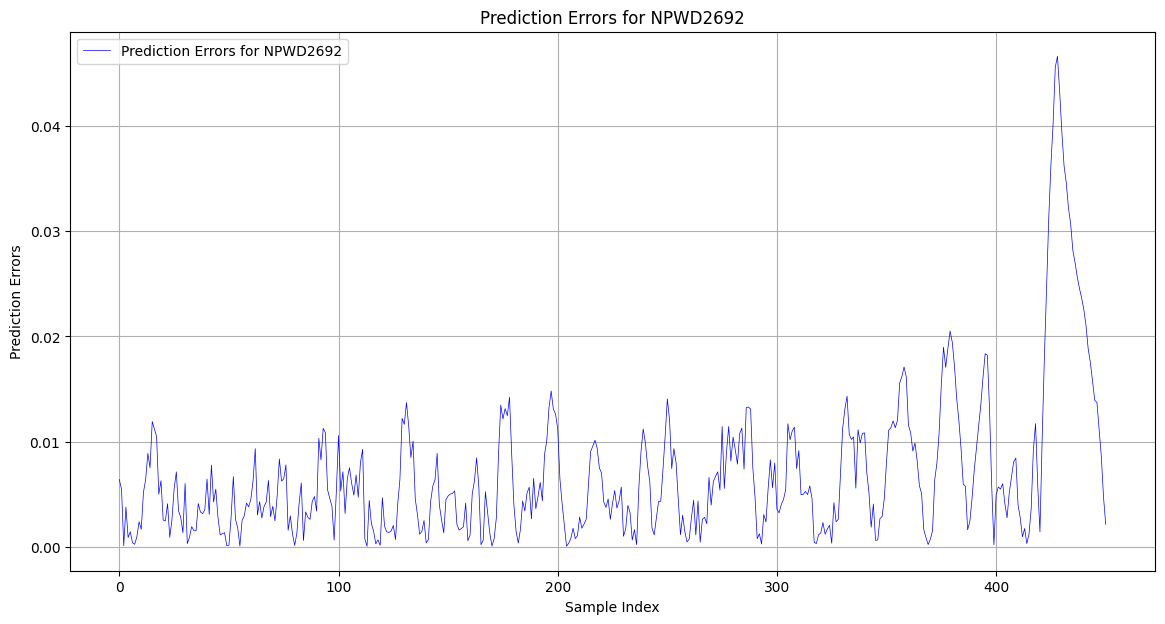

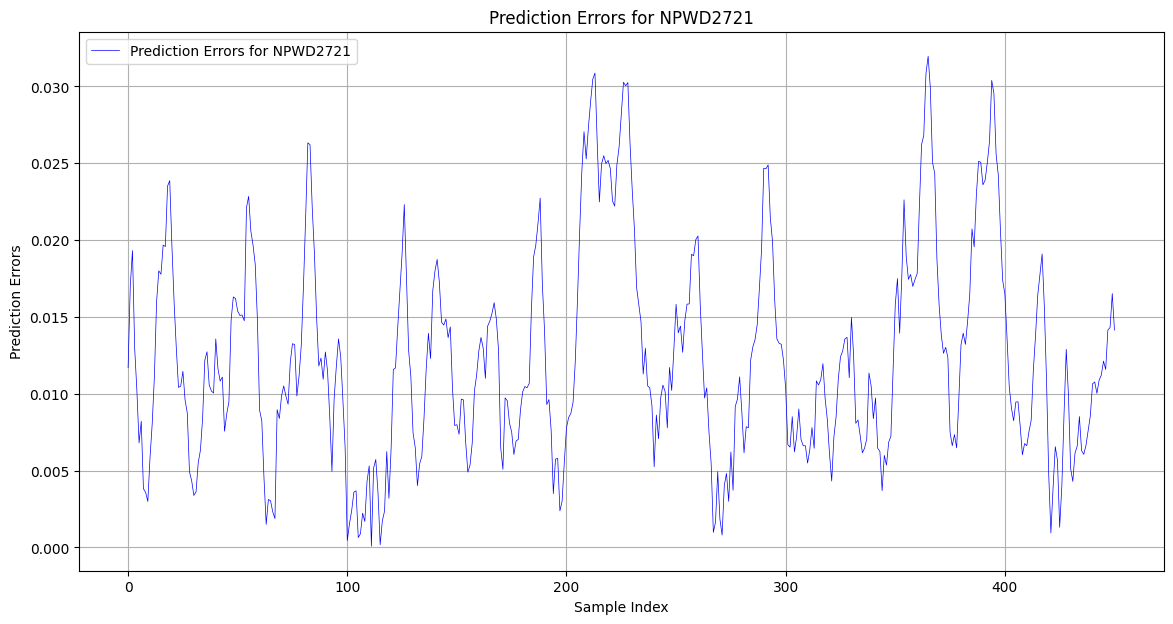

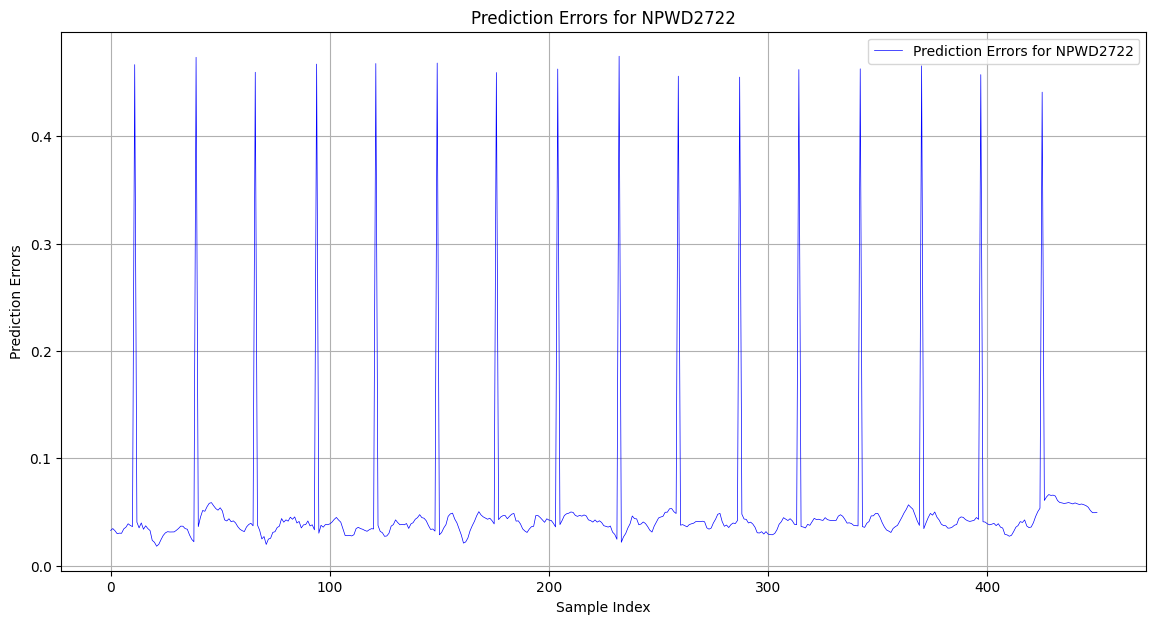

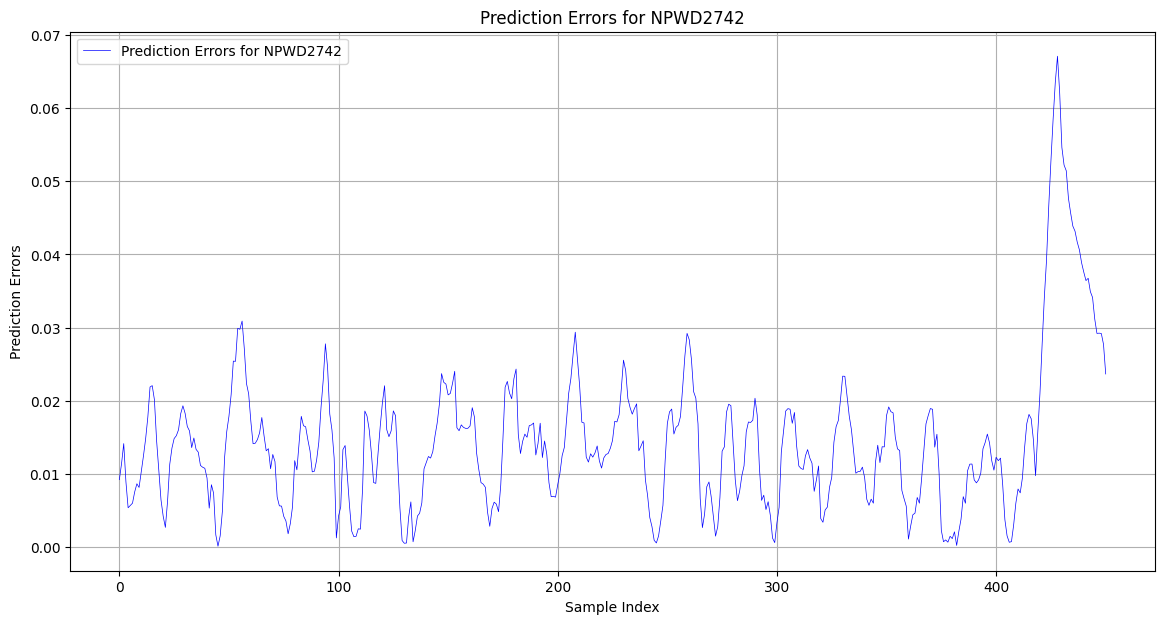

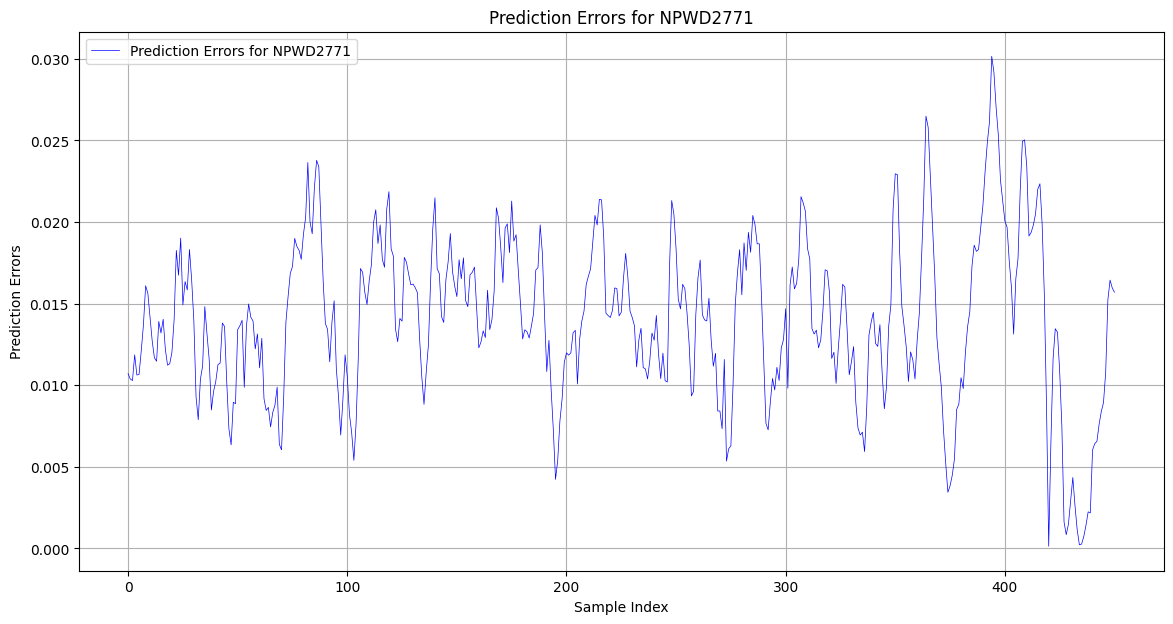

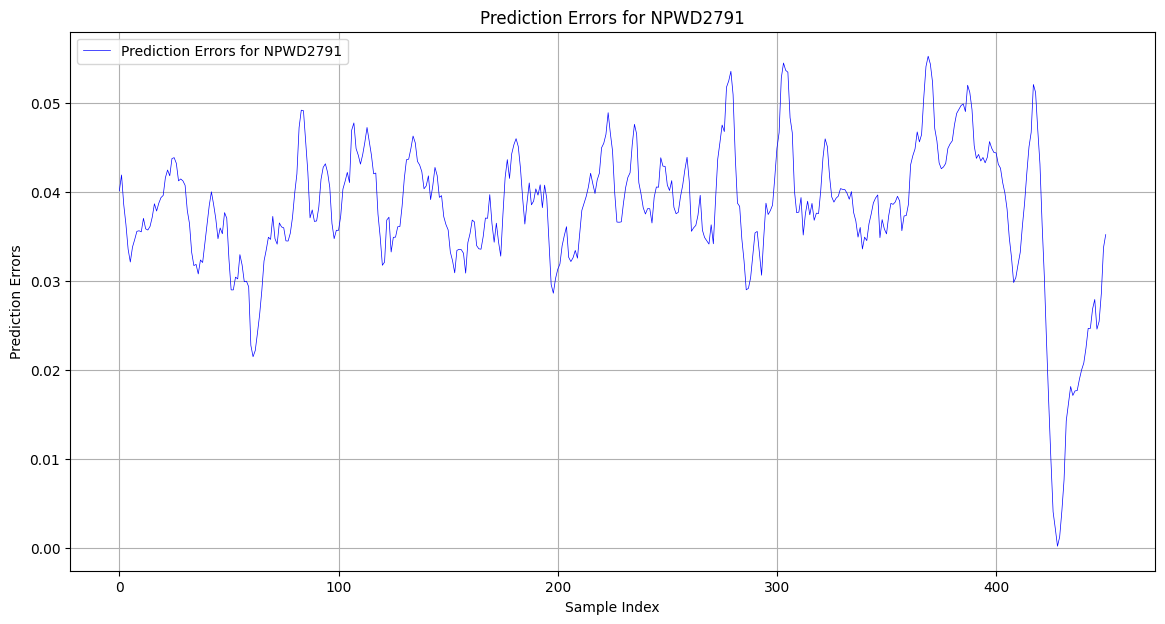

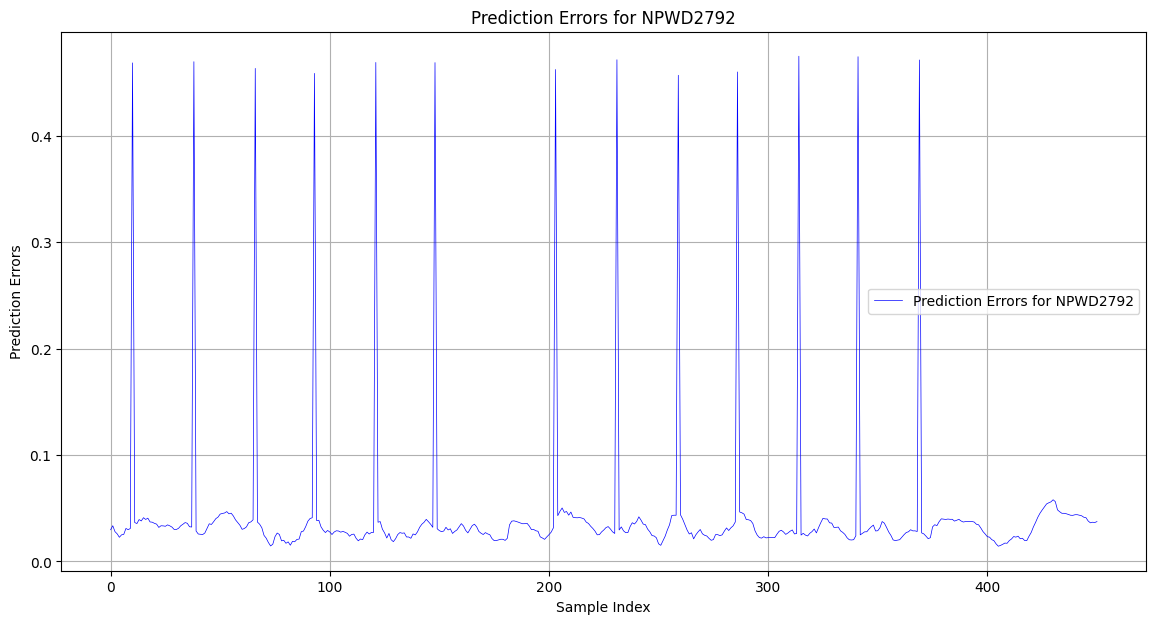

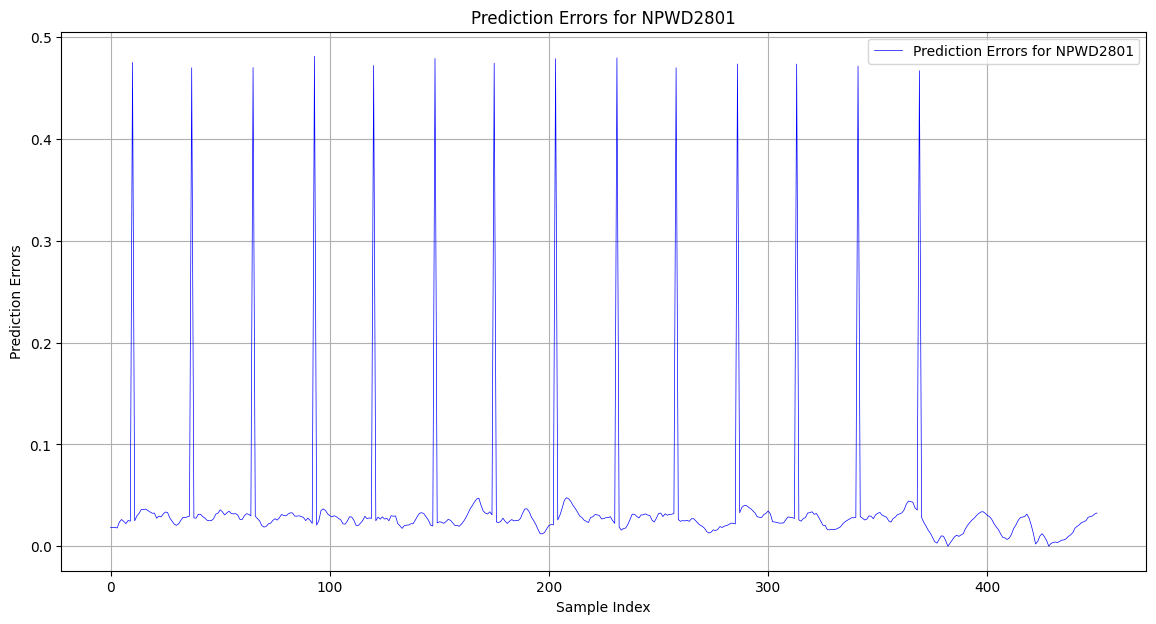

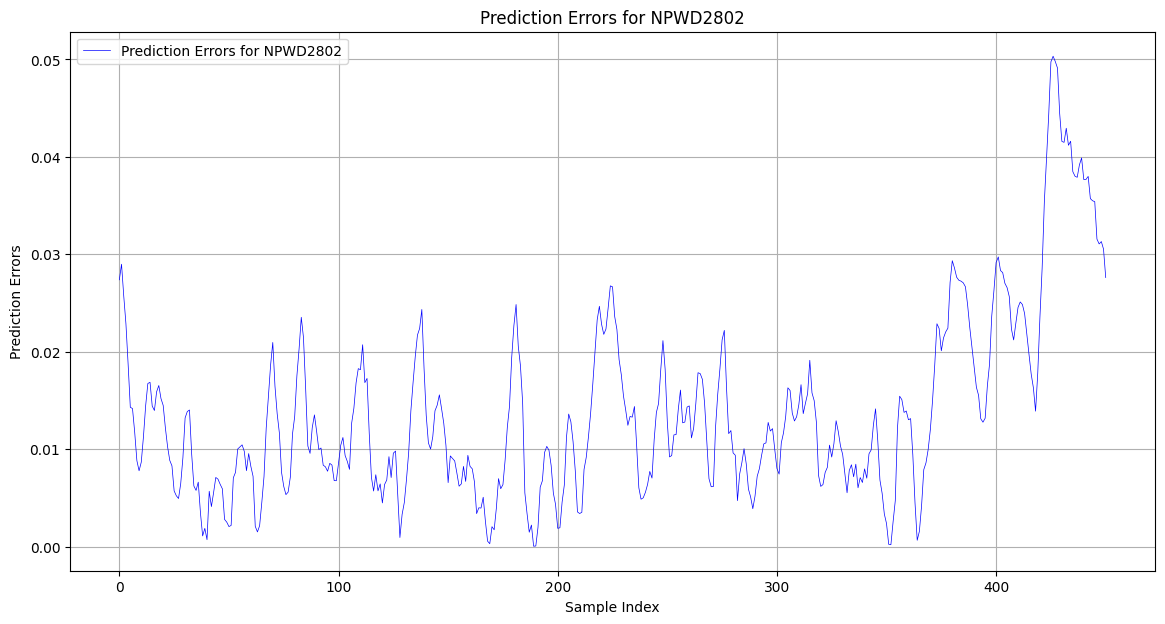

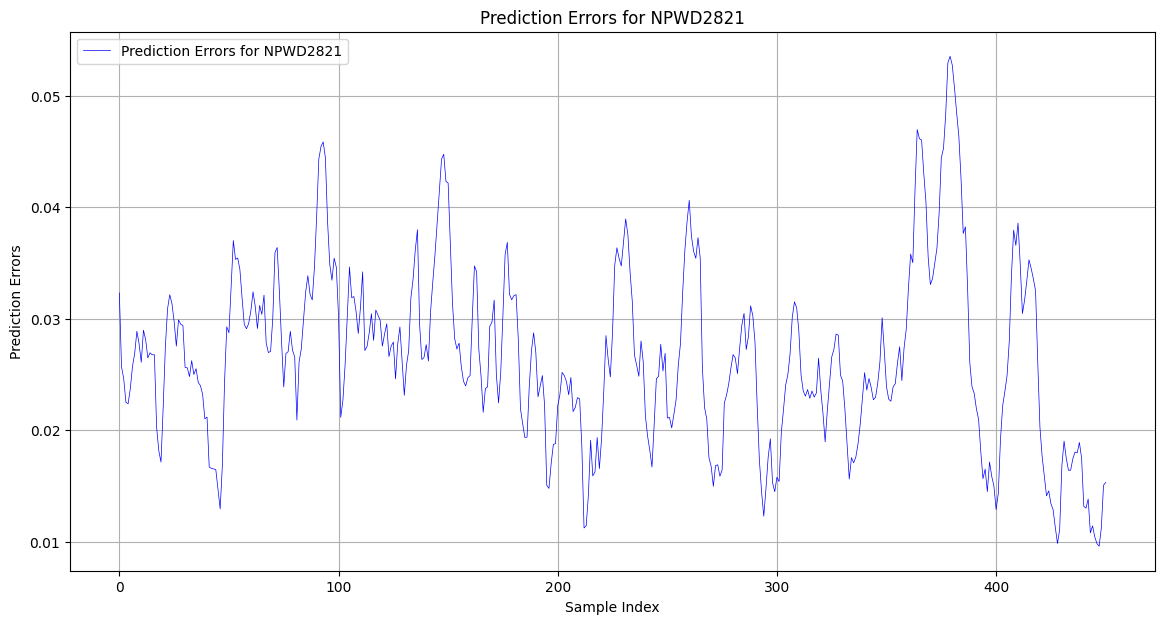

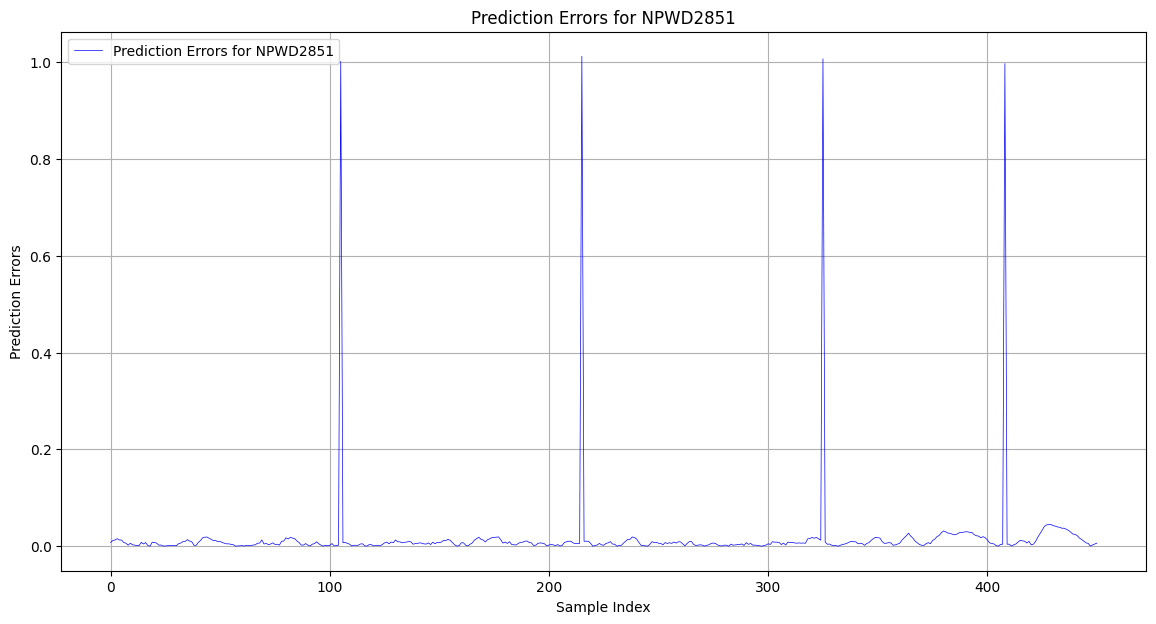

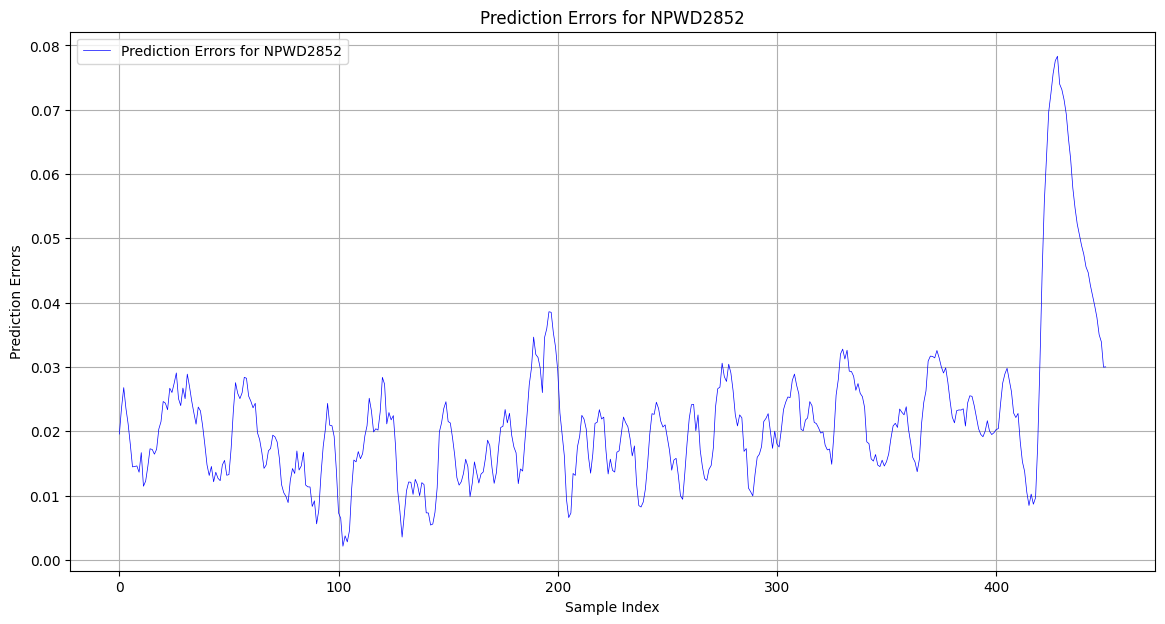

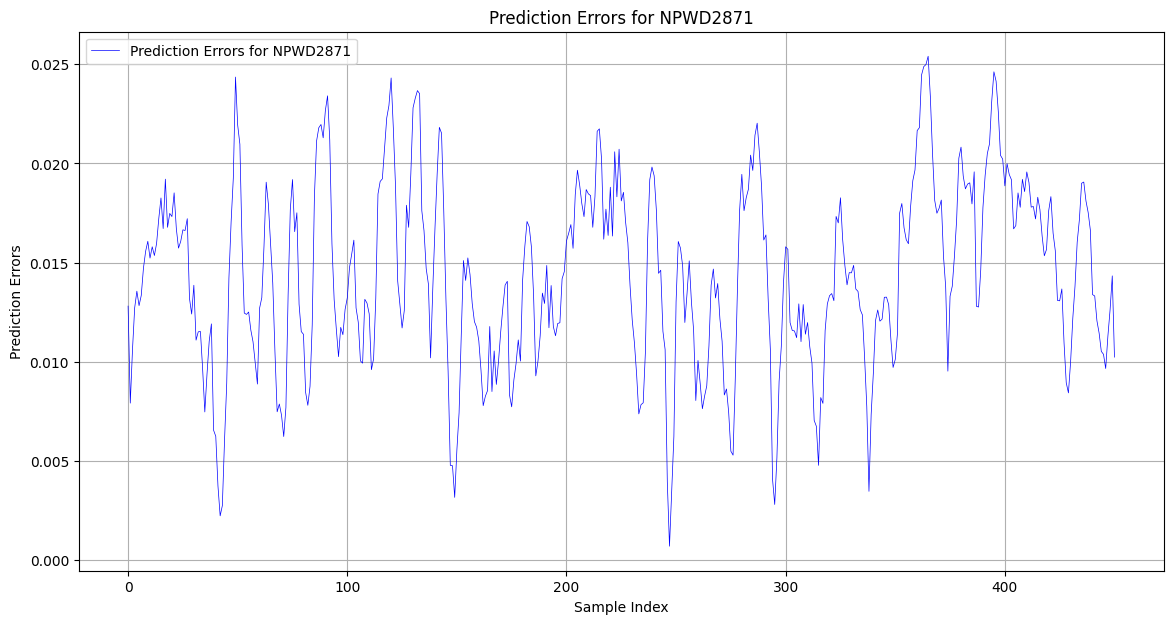

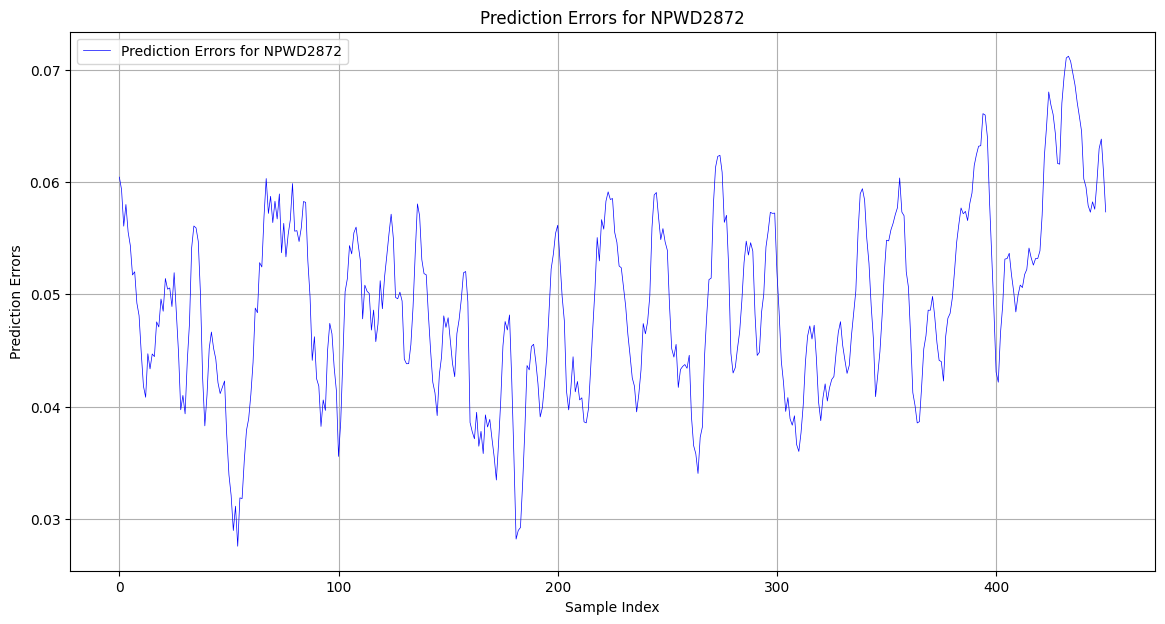

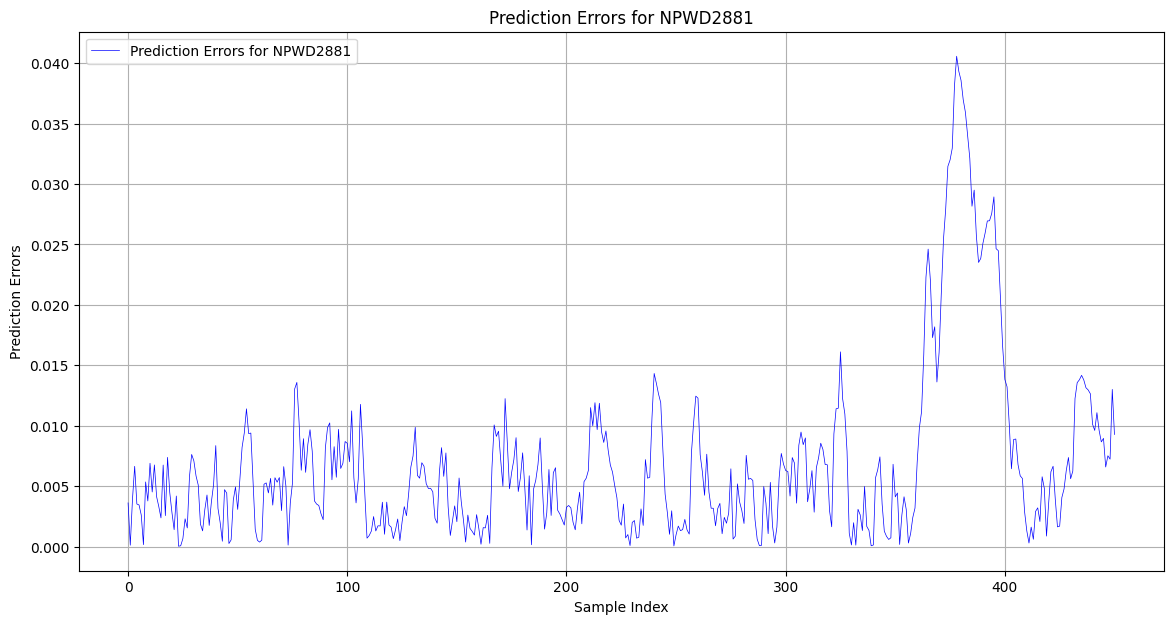

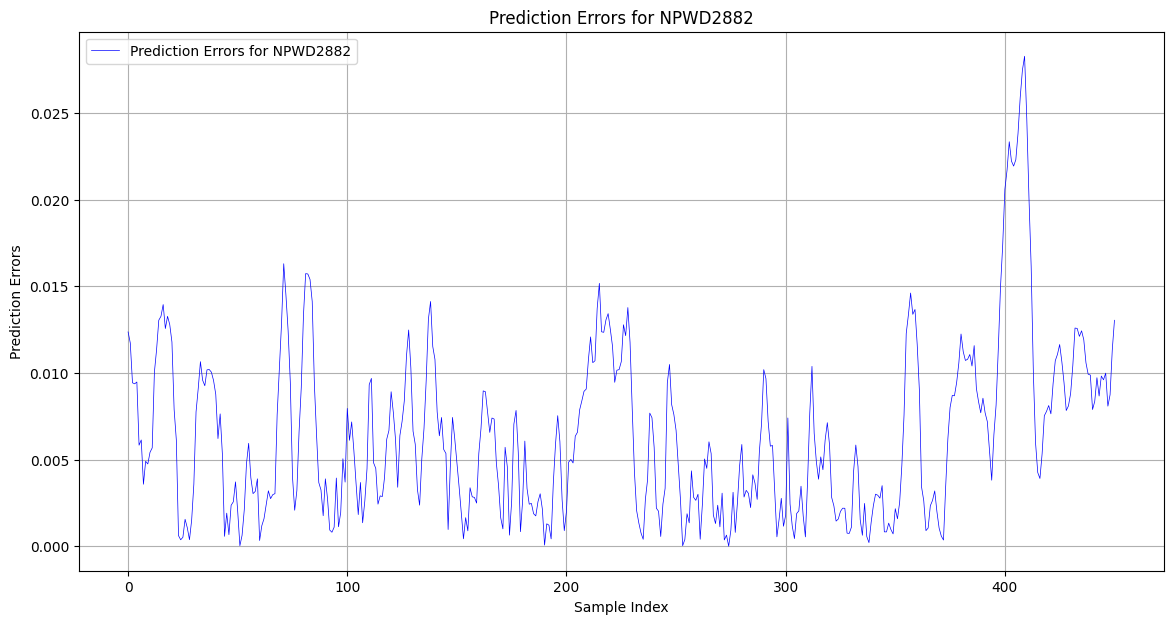

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming prediction_errors is a tensor or array containing errors for multiple power lines
# and data_values is the DataFrame containing the corresponding power lines
# First, filter columns that start with "NPWD"
npwd_columns = [col for col in data_values.columns if col.startswith('NPWD')]

# Loop through each NPWD column to plot prediction errors
for i, column in enumerate(npwd_columns):
    # Assuming prediction_errors contains errors for all lines in the same order as npwd_columns
    prediction_errors_np = prediction_errors[:, i].cpu().numpy().flatten()  # Selecting ith power line's errors

    plt.figure(figsize=(14, 7))
    plt.plot(prediction_errors_np, label=f'Prediction Errors for {column}', color='blue', linewidth=0.5)

    # Add labels and title
    plt.xlabel('Sample Index')
    plt.ylabel('Prediction Errors')
    plt.title(f'Prediction Errors for {column}')
    plt.legend()

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.show()
